In [1]:
import pandas as pd
import numpy as np

# Pandas Data Serries

In [3]:
monthly_rev = pd.Series([100, 200, 300, 400,np.nan, 500, None, "string"], name = "monthly_revenue")
print( monthly_rev)
print(monthly_rev.values)
print(monthly_rev.index)

0       100
1       200
2       300
3       400
4       NaN
5       500
6      None
7    string
Name: monthly_revenue, dtype: object
[100 200 300 400 nan 500 None 'string']
RangeIndex(start=0, stop=8, step=1)


# Pandas Data Frame

In [2]:
data = {
    'Employee': ['John', 'Doe', 'Jane', 'Doe', 'John', 'Janee', 'test', None, np.nan, '', ' '],
    'Department': ['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'IT','HR', 'IT', 'None', 'None'],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 1, 2]
}
df = pd.DataFrame(data)
print(df)
df.Department.str.contains("IT")


   Employee Department  Salary
0      John         IT   50000
1       Doe         HR   60000
2      Jane         IT   70000
3       Doe         HR   80000
4      John         IT   90000
5     Janee         HR  100000
6      test         IT  110000
7      None         HR  120000
8       NaN         IT  130000
9                 None       1
10                None       2


0      True
1     False
2      True
3     False
4      True
5     False
6      True
7     False
8      True
9     False
10    False
Name: Department, dtype: bool

# Exploring and inspecting Pandas Data Frame

In [7]:
# df.head(2)    # show only first 5 records
# df.tail() # show only last 5 records
# df.info() # show information about the data frame
# df.describe() # show statistics about the data frame
# df.shape # show number of rows and columns
# df.columns # show column names
# df.index # show index
# df.dtypes # show data types
# df.isnull() # show null values
# df.isnull()   # show null values
df.isna()   # show null values
# df.isnull().sum() # show number of null values


,Employee,Department,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,True,False,False
8,True,False,False
9,False,False,False


<Axes: xlabel='Employee'>

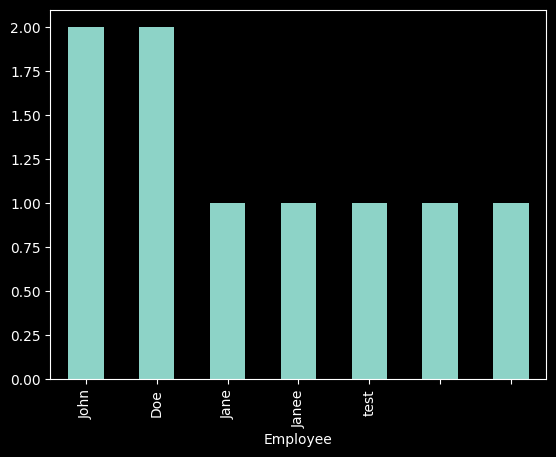

In [150]:
# aggregate each column record value count
# df.Department.value_counts()
df.Employee.value_counts().plot(kind='bar')

# simulate a missing values

In [11]:
# consider the empty string as null and ' ' as null
df.loc[df.last_valid_index(), "Employee"] = "                     "
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.isna()

,Employee,Department,Salary
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,True,False,False
8,True,False,False
9,True,False,False


# Selecting and Filtering Dataframes

In [23]:
# print(df[["Employee", "Department", "Salary"]])
# print(df.loc[2, ["Employee", "Department", "Salary"]])
print(df.iloc[2:])

   Employee Department  Salary
2      Jane         IT   70000
3       Doe         HR   80000
4      John         IT   90000
5     Janee         HR  100000
6      test         IT  110000
7      None         HR  120000
8       NaN         IT  130000
9       NaN       None       1
10      NaN       None       2


# Filtering Dataframes

In [16]:
f1 = df["Employee"] == "John"
f2 = df["Salary"] > 100000
print(df[f1 & f2])


Empty DataFrame
Columns: [Employee, Department, Salary]
Index: []


# Grouping and Aggregating Dataframes

In [11]:
print(df.groupby("Department").sum())

            Salary
Department        
HR          360000
IT          450000
None             3


#  Modifying Dataframes and Adding Columns

In [22]:
# df["Employee"] = df["Employee"].str.title() #Upeer, lower
# print(df)
df["is_manager"] = df["Salary"] > 90000
print(df)

   Employee Department  Salary  is_manager
0      John         IT   50000       False
1       Doe         HR   60000       False
2      Jane         IT   70000       False
3       Doe         HR   80000       False
4      John         IT   90000       False
5     Janee         HR  100000        True
6      Test         IT  110000        True
7      None         HR  120000        True
8       NaN         IT  130000        True
9                 None       1       False
10                None       2       False


# Handing Missing Data

In [33]:
# df.replace(0, np.nan, regex=True, inplace=True)
# df.fillna(0, inplace=True)
# print(df)

mean_salary = df["Salary"].mean()
print(mean_salary)


73636.63636363637


# Grouping and Aggregating Dataframes

In [41]:
df_revenue = pd.DataFrame({
    "Company": ["Google", "Google", "Microsoft", "Microsoft"],
    "Product": ["Android", "Google Search", "Windows", "Office"],
    "Revenue": [100, 200, 300, 400],
    "Quarter": [1, 2, 3, 4]
})
grouped = df_revenue.groupby("Company")
print(grouped["Revenue"].sum())


Company
Google       300
Microsoft    700
Name: Revenue, dtype: int64


# Merging DataFrames

In [53]:
df_managers = pd.DataFrame({
    "manager_id":[1,2,3],
    "name": ["Alice", "Bob", "Charlie"],
})
df_companies = pd.DataFrame({
    "ids":[1,2,3],
    "Company": ["Google", "Microsoft", "Apple"],
    "Country": ["USA", "USA", "USA"],
    "manager_id": [1, 2, 3],
})
print(df_managers.merge(df_companies, how="inner", on="manager_id")[["name", "Company"]].sort_values(by="Company"))


      name    Company
2  Charlie      Apple
0    Alice     Google
1      Bob  Microsoft
